In [ ]:
import numpy as np
from sklearn.datasets import make_sparse_spd_matrix
from scipy import linalg as LA
import pandas as pd
import time, os
import matplotlib.pyplot as plt

from pyinstrument import Profiler

from infoband.band_info import InfoCorrBand
from wlpy.covariance import Covariance
from utils.adpt_correlation_threshold import AdptCorrThreshold
from wlpy.gist import heatmap
from utils.covest import NetBanding

import warnings
warnings.filterwarnings("ignore")

from my_api import *

: 

# proposed estimator

0.5 100 100
fro 0.5


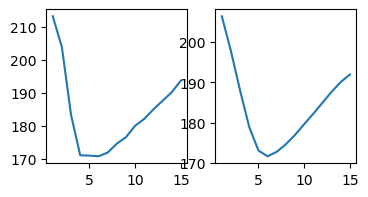

0 6


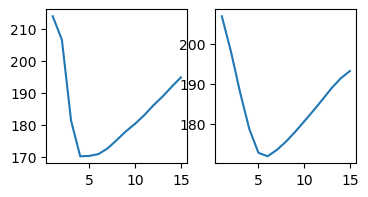

1 6


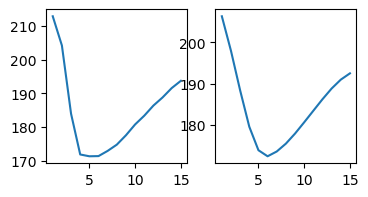

2 6
data\fro,R,100,100,['AR1', 0.5],['lx_band', 0.5].txt
data\fro,S,100,100,['AR1', 0.5],['lx_band', 0.5].txt
fro 0.8


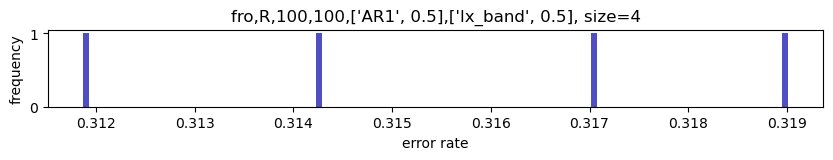

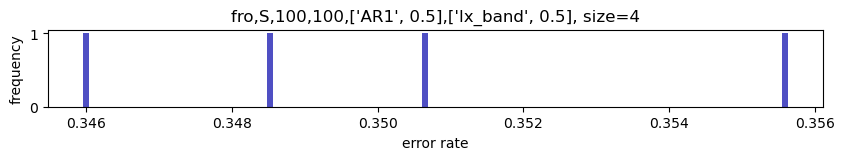

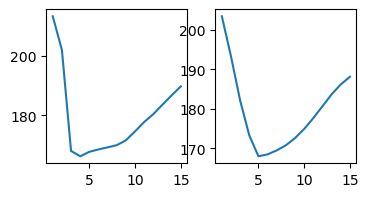

0 5


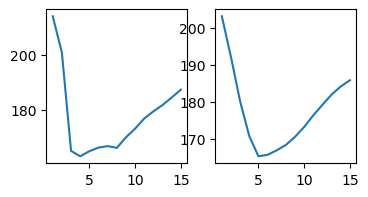

1 5


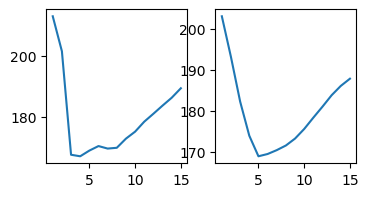

2 5
data\fro,R,100,100,['AR1', 0.5],['lx_band', 0.8].txt
data\fro,S,100,100,['AR1', 0.5],['lx_band', 0.8].txt
fro 0.95


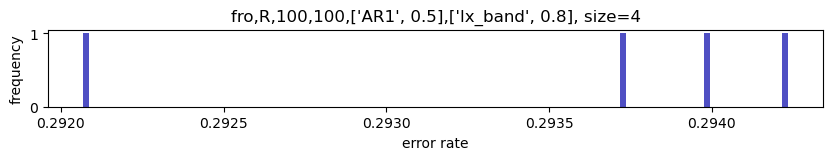

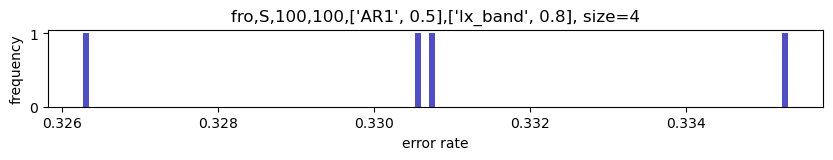

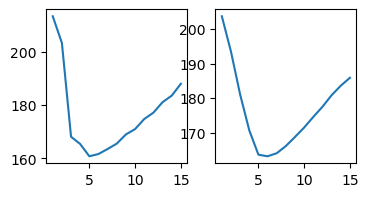

0 6


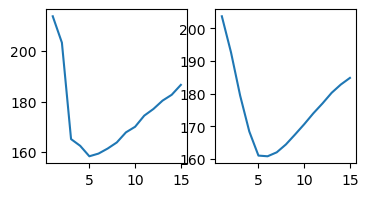

KeyboardInterrupt: 

In [8]:
repetition = 100
for rho in [0.5, 0.8, 0.95, 0.99]:
    for N in [100, 300, 500]:
            S = gen_S_AR1(N = N, rho = rho)
            R = cov2cor(S)
            for T in [100, 300, 500]:
                print(rho, N, T)
                                
                for ord in ['fro', 2]:
                    for eta in [0.5, 0.8, 0.95, 1]:
                        err_cor = []
                        err_cov = []
                        # err_lwg = []
                        
                        print(ord, eta)
                        
                        for i in range(repetition): 
                            # profiler = Profiler()
                            # profiler.start()
                            
                            X = np.random.RandomState(seed = i).multivariate_normal(mean = np.zeros(N), cov = S, size = T)
                            L = gen_L(S, eta, draw_type = 'random', near_factor = None, seed = i)
                            c = InfoCorrBand(X, L, num_cv = 50)
                            R_est, S_est, k = c.auto_fit(cv_option = 'fast_iter', verbose = False)
                            
                            # # ===== lwg method =====
                            # G = ((c.rowSort <= k) & (c.rowSort.T <= k)).astype(int)
                            # m = NetBanding(X, G)
                            # param_threshold= m.params_by_cv('brute')
                            # S_lwg = m.fit(param_threshold)
                            # # ======================
                            
                            print(i, k)
                            # profiler.stop()
                            # profiler.print()
                            
                            err_cor.append(LA.norm(R - R_est, ord))
                            err_cov.append(LA.norm(S - S_est, ord))
                            # err_lwg.append(LA.norm(S - S_lwg, ord))
                        err_cor = err_cor / LA.norm(R, ord)
                        err_cov = err_cov / LA.norm(S, ord)
                        # err_lwg = err_lwg / LA.norm(S, ord)
                        
                        save_data_fig(err_cor, ord, 'R', N, T, 
                                      cov_dscrb = ['AR1', rho], simu_dscrb = ['lx_band', eta], is_save = 1)
                        save_data_fig(err_cov, ord, 'S', N, T, 
                                      cov_dscrb = ['AR1', rho], simu_dscrb = ['lx_band', eta], is_save = 1)
                        # save_data_fig(err_lwg, ord, 'lwg_cov', draw_type, eta, N, T, rho, near_factor, is_save = 1)

0.3 100 100
fro 0.5


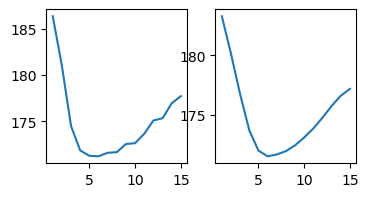

0 6


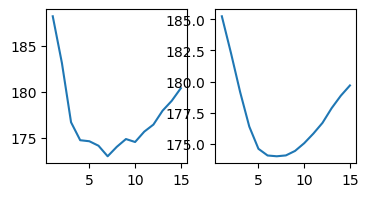

1 7


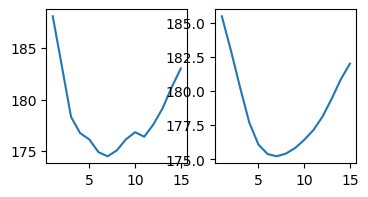

2 7
data\fro,R,100,100,['Grav', 0.3],['lx_band', 0.5].txt
data\fro,S,100,100,['Grav', 0.3],['lx_band', 0.5].txt
fro 0.8


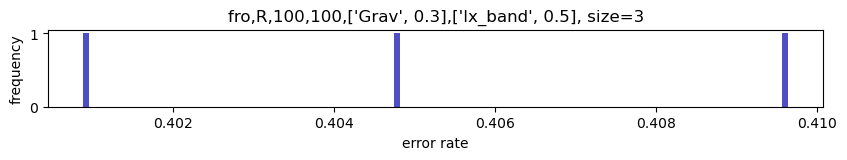

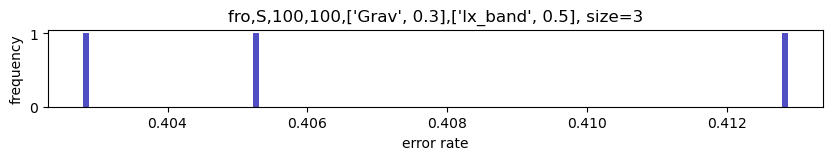

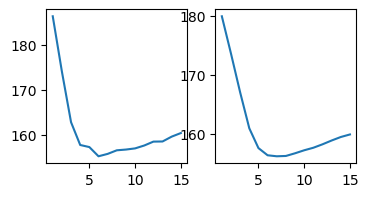

0 7


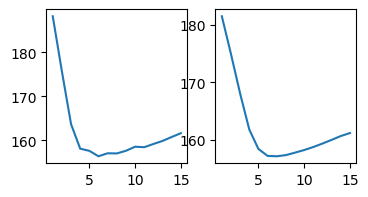

1 7


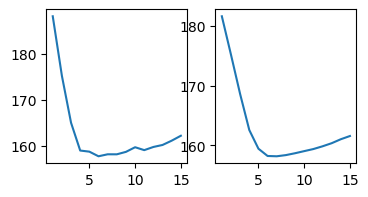

2 7
data\fro,R,100,100,['Grav', 0.3],['lx_band', 0.8].txt
data\fro,S,100,100,['Grav', 0.3],['lx_band', 0.8].txt
fro 0.95


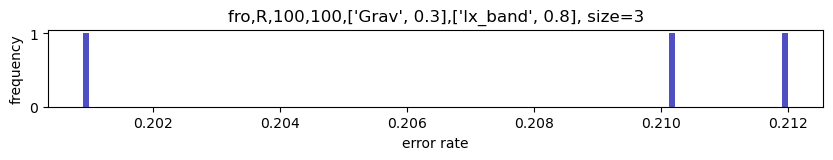

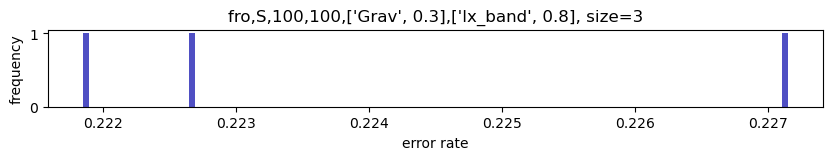

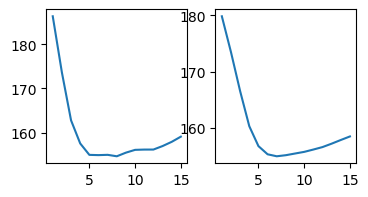

0 7


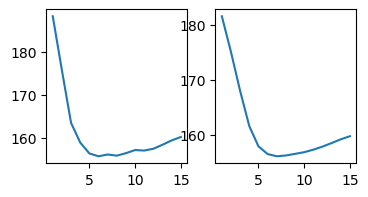

1 7


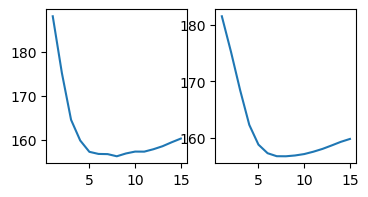

2 8
data\fro,R,100,100,['Grav', 0.3],['lx_band', 0.95].txt
data\fro,S,100,100,['Grav', 0.3],['lx_band', 0.95].txt
fro 1


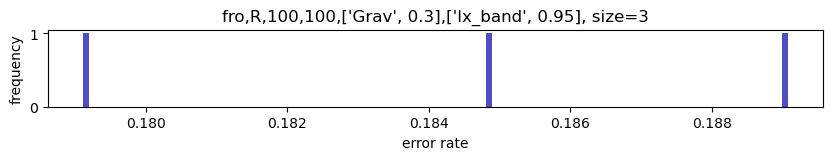

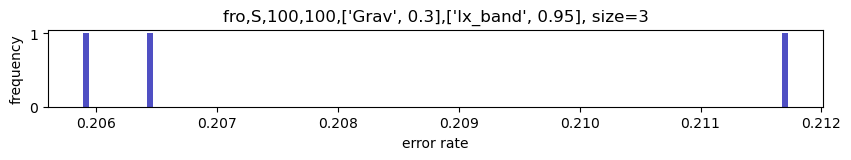

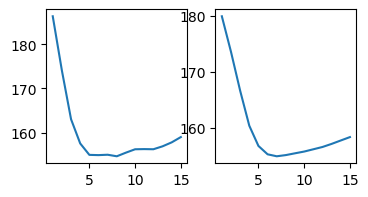

0 7


KeyboardInterrupt: 

In [2]:
repetition = 100
for max_mass in [0.3, 0.5, 0.8, 0.99]:
    for N in [100, 300, 500]:
            S = gen_S_gravity(N = N, max_mass = max_mass, heteroskedasticity = True, seed = 0)
            R = cov2cor(S)
            for T in [100, 300, 500]:
                print(max_mass, N, T)
                                
                for ord in ['fro', 2]:
                    for eta in [0.5, 0.8, 0.95, 1]:
                        err_cor = []
                        err_cov = []
                        # err_lwg = []
                        
                        print(ord, eta)
                        
                        for i in range(repetition): 
                            # profiler = Profiler()
                            # profiler.start()
                            
                            X = np.random.RandomState(seed = i).multivariate_normal(mean = np.zeros(N), cov = S, size = T)
                            L = gen_L(S, eta, draw_type = 'random', near_factor = None, seed = i)
                            c = InfoCorrBand(X, L, num_cv = 50)
                            R_est, S_est, k = c.auto_fit(cv_option = 'fast_iter', verbose = False)
                            
                            # # ===== lwg method =====
                            # G = ((c.rowSort <= k) & (c.rowSort.T <= k)).astype(int)
                            # m = NetBanding(X, G)
                            # param_threshold= m.params_by_cv('brute')
                            # S_lwg = m.fit(param_threshold)
                            # # ======================
                            
                            print(i, k)
                            # profiler.stop()
                            # profiler.print()
                            
                            err_cor.append(LA.norm(R - R_est, ord))
                            err_cov.append(LA.norm(S - S_est, ord))
                            # err_lwg.append(LA.norm(S - S_lwg, ord))
                        err_cor = err_cor / LA.norm(R, ord)
                        err_cov = err_cov / LA.norm(S, ord)
                        # err_lwg = err_lwg / LA.norm(S, ord)
                        
                        save_data_fig(err_cor, ord, 'R', N, T, 
                                      cov_dscrb = ['Grav', max_mass], simu_dscrb = ['lx_band', eta], is_save = 1)
                        save_data_fig(err_cov, ord, 'S', N, T, 
                                      cov_dscrb = ['Grav', max_mass], simu_dscrb = ['lx_band', eta], is_save = 1)
                        # save_data_fig(err_lwg, ord, 'lwg_cov', draw_type, eta, N, T, rho, near_factor, is_save = 1)

# Other method

In [30]:
N = 500
T = 300
rho = 0.95
S = gen_S_AR1(N = N, rho = rho)
R = cov2cor(S)
seed = 1
rng = np.random.RandomState(seed) if 1 else np.random
X = rng.multivariate_normal(mean = np.zeros(N), cov = S, size = T)

In [31]:
# G_zero = np.zeros((N, N))
G_zero = np.ones((N, N)) - np.eye(N)
m = AdptCorrThreshold(pd.DataFrame(X), G_zero)

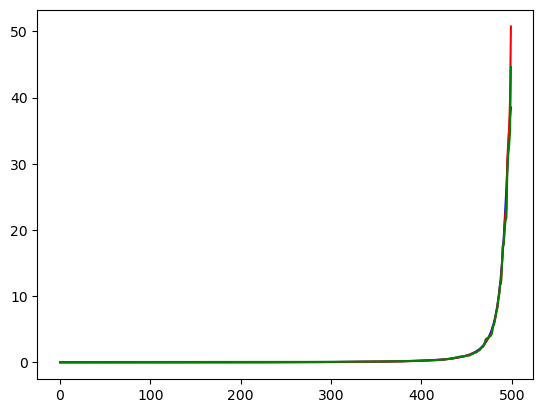

In [40]:
plt.plot(np.linalg.eigvals(S)[::-1], color = 'blue');
plt.plot(np.sort(np.linalg.eigvals(m.sample_cov())), color = 'red');
plt.plot(np.sort(np.linalg.eigvals(m.nonlin_shrink())), color = 'green');
# plt.plot(np.sort(np.linalg.eigvals(m.lw_lin_shrink())), color = 'purple');